# Import Required Libraries
Import the necessary libraries, including pandas and matplotlib.

In [1]:
# Importing required librariescd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gorgona.generator import BacteriaAmountGenerator

# Distribution of average amount for all bacteria

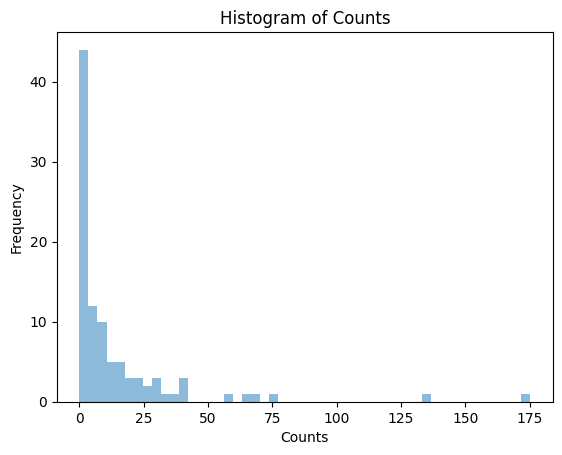

In [2]:
# Define the input file and threshold
input_file = '../data/input_files/average_day7.txt'
threshold = 0

# Create an object of the BacteriaAmountGenerator class
bacteria_amount_generator = BacteriaAmountGenerator(input_file, 
													threshold, 
													plot_figs=True, 
													figures_path="../data/figures")
bacteria_amount_df = bacteria_amount_generator.num_bac_genomes.copy()

# Distribution of average amount for bacteria above amount threshold of 10

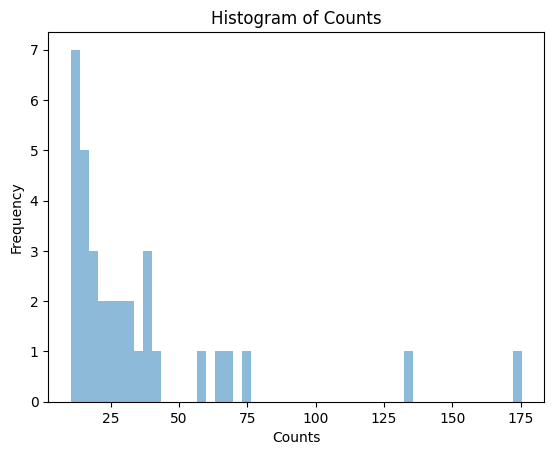

In [32]:
# Define the input file and threshold
input_file = '../data/input_files/average_day7.txt'
threshold = 10

# Create an object of the BacteriaAmountGenerator class
bacteria_amount_generator = BacteriaAmountGenerator(input_file, 
													threshold, 
													plot_figs=True, 
													figures_path="../data/figures")
bacteria_amount_df = bacteria_amount_generator.num_bac_genomes.copy()

In [33]:
bacteria_amount_df.shape

(34, 2)

In [34]:
bacteria_amount_df['count'].sum()

np.float64(1192.4751947050477)

Next step is to come up with the set of **multipliers** in order to have amount of bacteria that will be closer to the density of bacteria observed in real experiment. To calculate it, you have to consider both **simulation box volume** and **volume of a single bacterium**.

Since units in our simulations are relative, let's assume that 1 µm is equal to 0.04 of our simulation length units, each bacterium is a sphere with radius $r$ and simulation box has size $(l, l, h)$, where $l$ is width/depth of simulation box and $h$ is its height, which spanning the space where bacteria initially located.

Regarding density of bacteria, Antton's calculation for the caecum of a 35 day-old chicken is **33,213,904 bacterial cells per 1 $mm^{3}$.

Let's assume the a single bacterium will be 1–3 µm in diameter (0.04–0.12 in simulation units).

Let's calculate upper boundary on estimation simulation box size, assuming that $l=h$:


In [35]:
expected_bac_amount_per_mm3 = 33213904 # per 1 mm^3
expected_volume_in_micrometers3 = 1000**3

In [36]:
expected_density_per_micrometer3 = expected_bac_amount_per_mm3 / expected_volume_in_micrometers3
expected_density_per_micrometer3

0.033213904

In [37]:
import numpy as np

In [38]:
# observed_size_sim_units = (7,7,3)
observed_size_sim_units = (12,12,1)
bacterium_diameter_in_micrometers = 1 # in micrometers # 1 micrometer = 0.04 sim units

sim_to_micrometer_factor = 25
micrometer_to_sim_factor = 0.04
observed_size_in_micrometers3 = tuple(i * sim_to_micrometer_factor for i in observed_size_sim_units)
observed_volume_in_micrometers3 = np.prod(observed_size_in_micrometers3)
observed_bacterium_amount = expected_density_per_micrometer3 * observed_volume_in_micrometers3
observed_bacterium_amount

np.float64(74731.284)

In [39]:
allowed_space_for_one_bacterium = observed_volume_in_micrometers3 / observed_bacterium_amount
allowed_space_for_one_bacterium # in micrometers^3

np.float64(30.10787289564033)

In [40]:
qubic_volume_of_bacterium = (bacterium_diameter_in_micrometers + bacterium_diameter_in_micrometers / 2) ** 3 # increased by a radius to avoid overlapping in simulation
qubic_volume_of_bacterium

3.375

In [41]:
assert qubic_volume_of_bacterium < allowed_space_for_one_bacterium
# if qubic_volume_of_bacterium almost equal to allowed_space_for_one_bacterium but still less,
# it's recommended to increase simulation box size or decrease bacterium diameter

It's better to use (10,10,10) simulation box with each bacterium of diameter 1 micrometer (0.04). It gives a total amount of bacteria of 518,967

Now, according to this number, we calculate multiplier:

In [42]:
multiplier = observed_bacterium_amount / bacteria_amount_df['count'].sum()
multiplier

np.float64(62.6690469804568)

In [43]:
bacteria_amount_df['count'].sum()

np.float64(1192.4751947050477)

# Generate bacteria amount for calculated multiplier

In [44]:
# Define the input file and threshold
input_file = '../data/input_files/average_day7.txt'
threshold = 10

# Create an object of the BacteriaAmountGenerator class
bacteria_amount_generator = BacteriaAmountGenerator(input_file, threshold, plot_figs=False, figures_path="../../data/figures")
bacteria_amount_df = bacteria_amount_generator.num_bac_genomes.copy()

# multiplier
# 25000 / bacteria_amount_df['count'].sum()
multiplier = observed_bacterium_amount / bacteria_amount_df['count'].sum() 

# Generate the bacteria amount given the threshold and multiplier
output_dir = '../data/01_bacteria_amount'
result_df = bacteria_amount_generator.generate_bacteria_amount(output_dir, multiplier)

In [45]:
result_df['count'].sum()

np.int64(74731)

In [46]:
assert result_df['count'].sum() == int(observed_bacterium_amount)

In [47]:
result_df.head()

,genome,count
0,D300423:bin_000011,1212
1,D300423:bin_000014,2423
2,D300431:bin_000017,1152
3,D300432:bin_000002,8417
4,D300433:bin_000005,10986
